In [ ]:
#Imports & Libraries to run the fake news detection system, PANDAS, NUMPY AND SKLEARN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
#Inserting and reading datasets
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

In [85]:
fake.shape

(23481, 4)

In [86]:
true.shape

(21417, 4)

In [59]:
#Flag to track real and fake tweets
fake['target'] = 'fake'
true['target'] = 'true'

In [60]:
#Joining together the dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [61]:
#Randomising the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [62]:
#Testing data
data.head()

,title,text,subject,date,target
0,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,"October 23, 2017",fake
1,LET THE REPARATIONS BEGIN: Rahm Emanuel Uses $...,"We do this not because it s legally required,...",politics,"May 15, 2015",fake
2,Trump due in court before Oval Office,(Reuters) - Within a few weeks of winning the ...,politicsNews,"November 9, 2016",true
3,"IF YOU’RE EASILY OFFENDED, Don’t Watch This Am...",You re gonna love this patriot! He speaks for ...,left-news,"Jan 19, 2016",fake
4,"Trump Threatens Joe Biden, Says He Would ‘Lov...",Republican nominee Donald Trump usually incite...,News,"October 26, 2016",fake


In [63]:
#Removing the date because its not nessesary
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,fake
1,LET THE REPARATIONS BEGIN: Rahm Emanuel Uses $...,"We do this not because it s legally required,...",politics,fake
2,Trump due in court before Oval Office,(Reuters) - Within a few weeks of winning the ...,politicsNews,true
3,"IF YOU’RE EASILY OFFENDED, Don’t Watch This Am...",You re gonna love this patriot! He speaks for ...,left-news,fake
4,"Trump Threatens Joe Biden, Says He Would ‘Lov...",Republican nominee Donald Trump usually incite...,News,fake


In [64]:
#Removing the title because its not nessesary
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"Pearson, an educational publishing company, is...",News,fake
1,"We do this not because it s legally required,...",politics,fake
2,(Reuters) - Within a few weeks of winning the ...,politicsNews,true
3,You re gonna love this patriot! He speaks for ...,left-news,fake
4,Republican nominee Donald Trump usually incite...,News,fake


In [65]:
#Converting to lowercase for better readabiltiy
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"pearson, an educational publishing company, is...",News,fake
1,"we do this not because it s legally required,...",politics,fake
2,(reuters) - within a few weeks of winning the ...,politicsNews,true
3,you re gonna love this patriot! he speaks for ...,left-news,fake
4,republican nominee donald trump usually incite...,News,fake


In [66]:
#Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [69]:
#Check data
data.head()

,text,subject,target
0,pearson an educational publishing company issu...,News,fake
1,we do this not because it s legally required ...,politics,fake
2,reuters within a few weeks of winning the whi...,politicsNews,true
3,you re gonna love this patriot he speaks for e...,left-news,fake
4,republican nominee donald trump usually incite...,News,fake


In [ ]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
#Check data again
data.head()

,text,subject,target
0,pearson educational publishing company issued ...,News,fake
1,legally required patton said hearing agreement...,politics,fake
2,reuters within weeks winning white house presi...,politicsNews,true
3,gonna love patriot speaks every one us 100 fed...,left-news,fake
4,republican nominee donald trump usually incite...,News,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


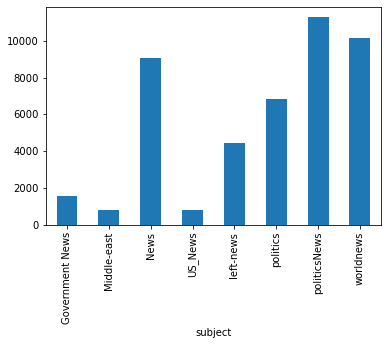

In [84]:
#How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


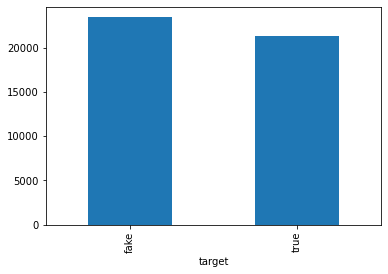

In [87]:
#Number of fake and real articles
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

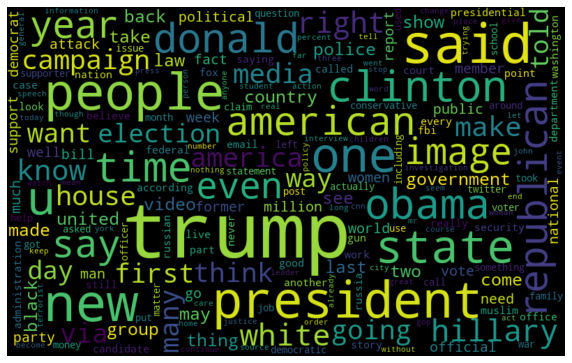

In [90]:
#Word cloud for fake news 
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

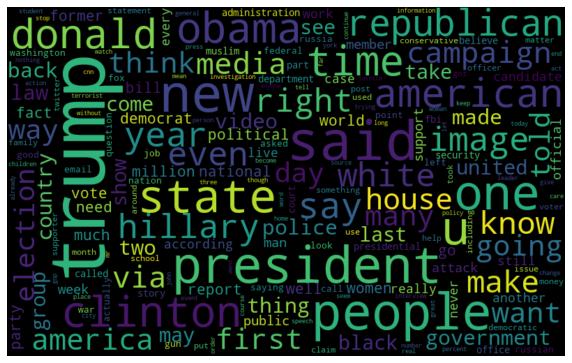

In [91]:
#Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
#Most frequent word generator
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

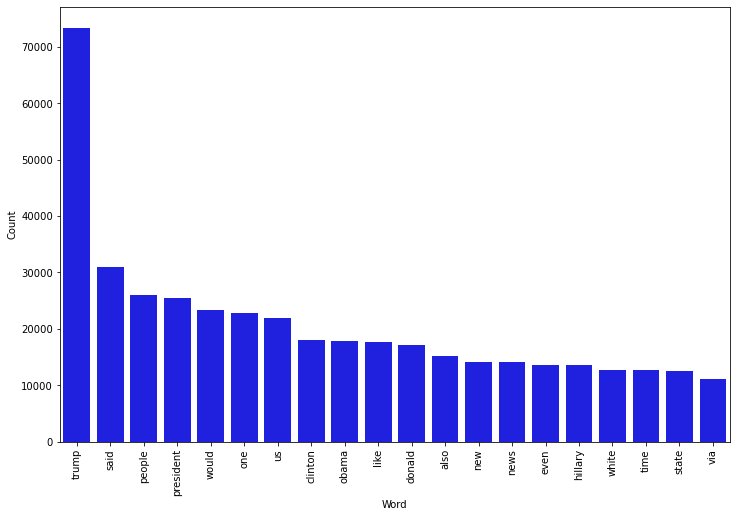

In [93]:
#Most frequent word (fake news)
counter(data[data["target"] == "fake"], "text", 20)

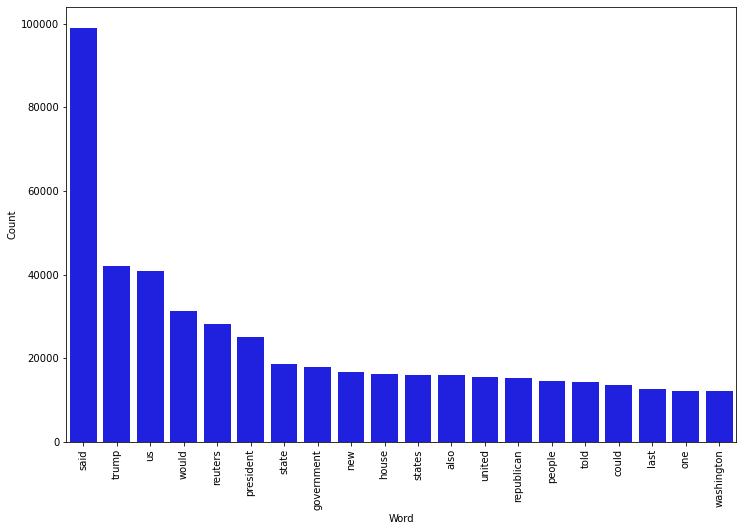

In [94]:
#Most frequent word (real news)
counter(data[data["target"] == "true"], "text", 20)